/var/folders/xh/2wkw_sr97y5chj8h8jwwpd6r0000gn/T/ipykernel_52698/1495293352.py:2: DtypeWarning: Columns (23,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/rahultaduri/data-science-spring-2024/data-science-spring-2024/Project/Data/t9peq0oezmcdvtoo.csv")
/var/folders/xh/2wkw_sr97y5chj8h8jwwpd6r0000gn/T/ipykernel_52698/1495293352.py:2: DtypeWarning: Columns (23,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/rahultaduri/data-science-spring-2024/data-science-spring-2024/Project/Data/t9peq0oezmcdvtoo.csv")
/var/folders/xh/2wkw_sr97y5chj8h8jwwpd6r0000gn/T/ipykernel_52698/2273544450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

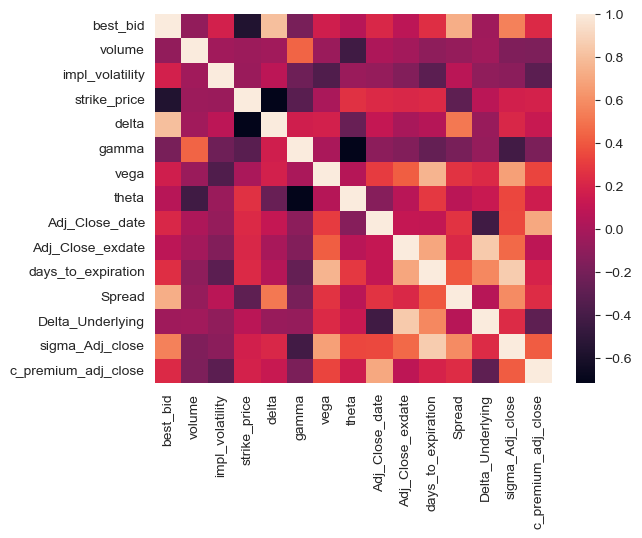

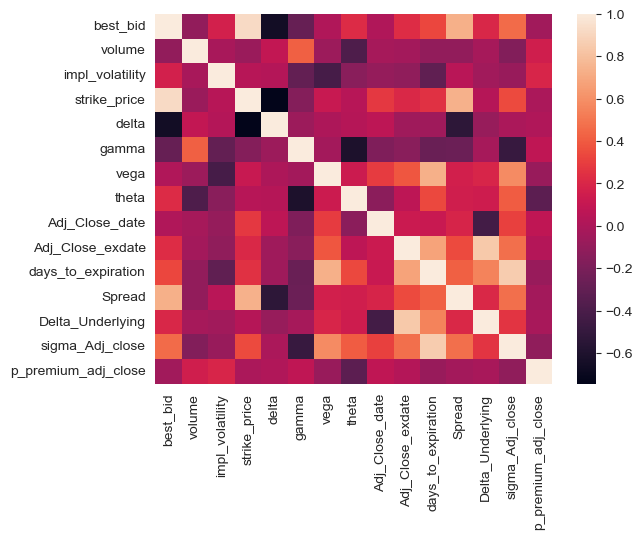

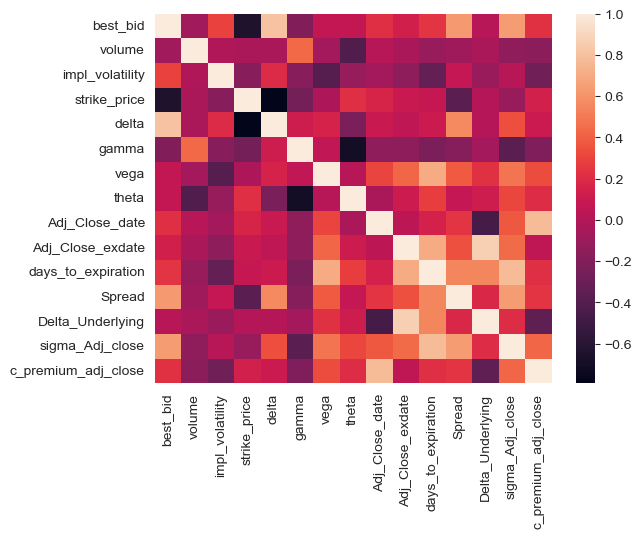

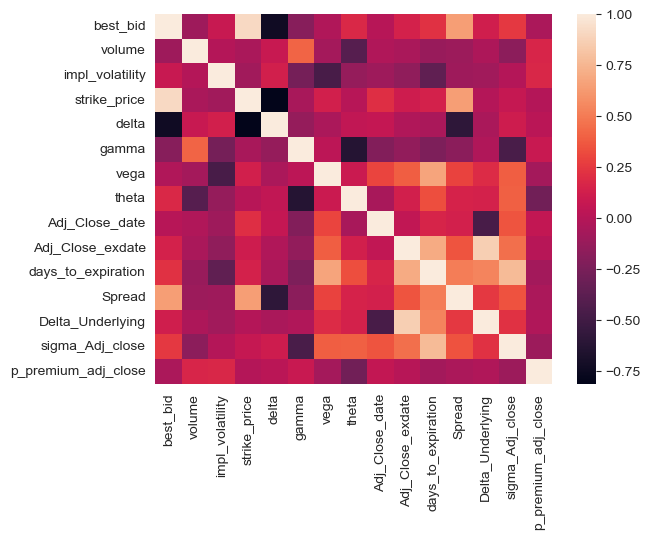

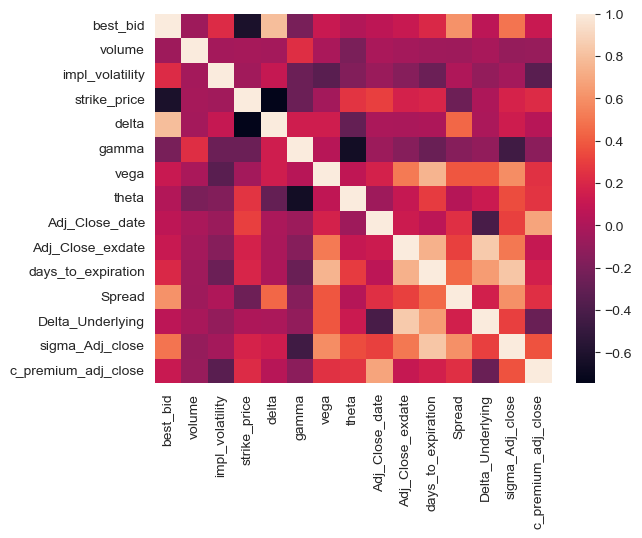

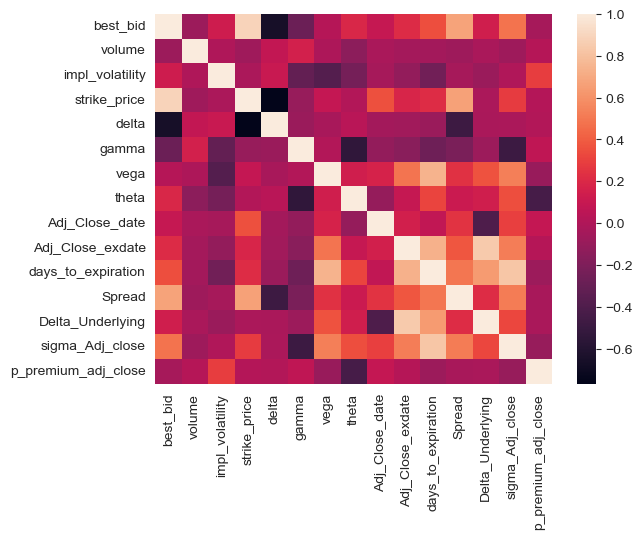

In [3]:
# Load data
%run Data_Clean_Rahul.ipynb

%run EDA_Rahul.ipynb

Linear Regression

In [6]:
predictors = ['best_bid', 'volume', 'impl_volatility','strike_price',
       'delta', 'gamma', 'vega', 'theta','Adj_Close_date', 'Adj_Close_exdate',
       'days_to_expiration', 'Spread', 'Delta_Underlying',
       #'prct_change', 'hist_volatility',
              'sigma_Adj_close']

In [7]:
# try on AMD Call data
X = AMD_Calls[predictors]
y = AMD_Calls['c_premium_adj_close']

In [8]:
#Split test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2)

In [9]:
print(X_train.shape)
print(X_test.shape)

(129819, 14)
(32455, 14)


In [10]:
from pandas.plotting import scatter_matrix

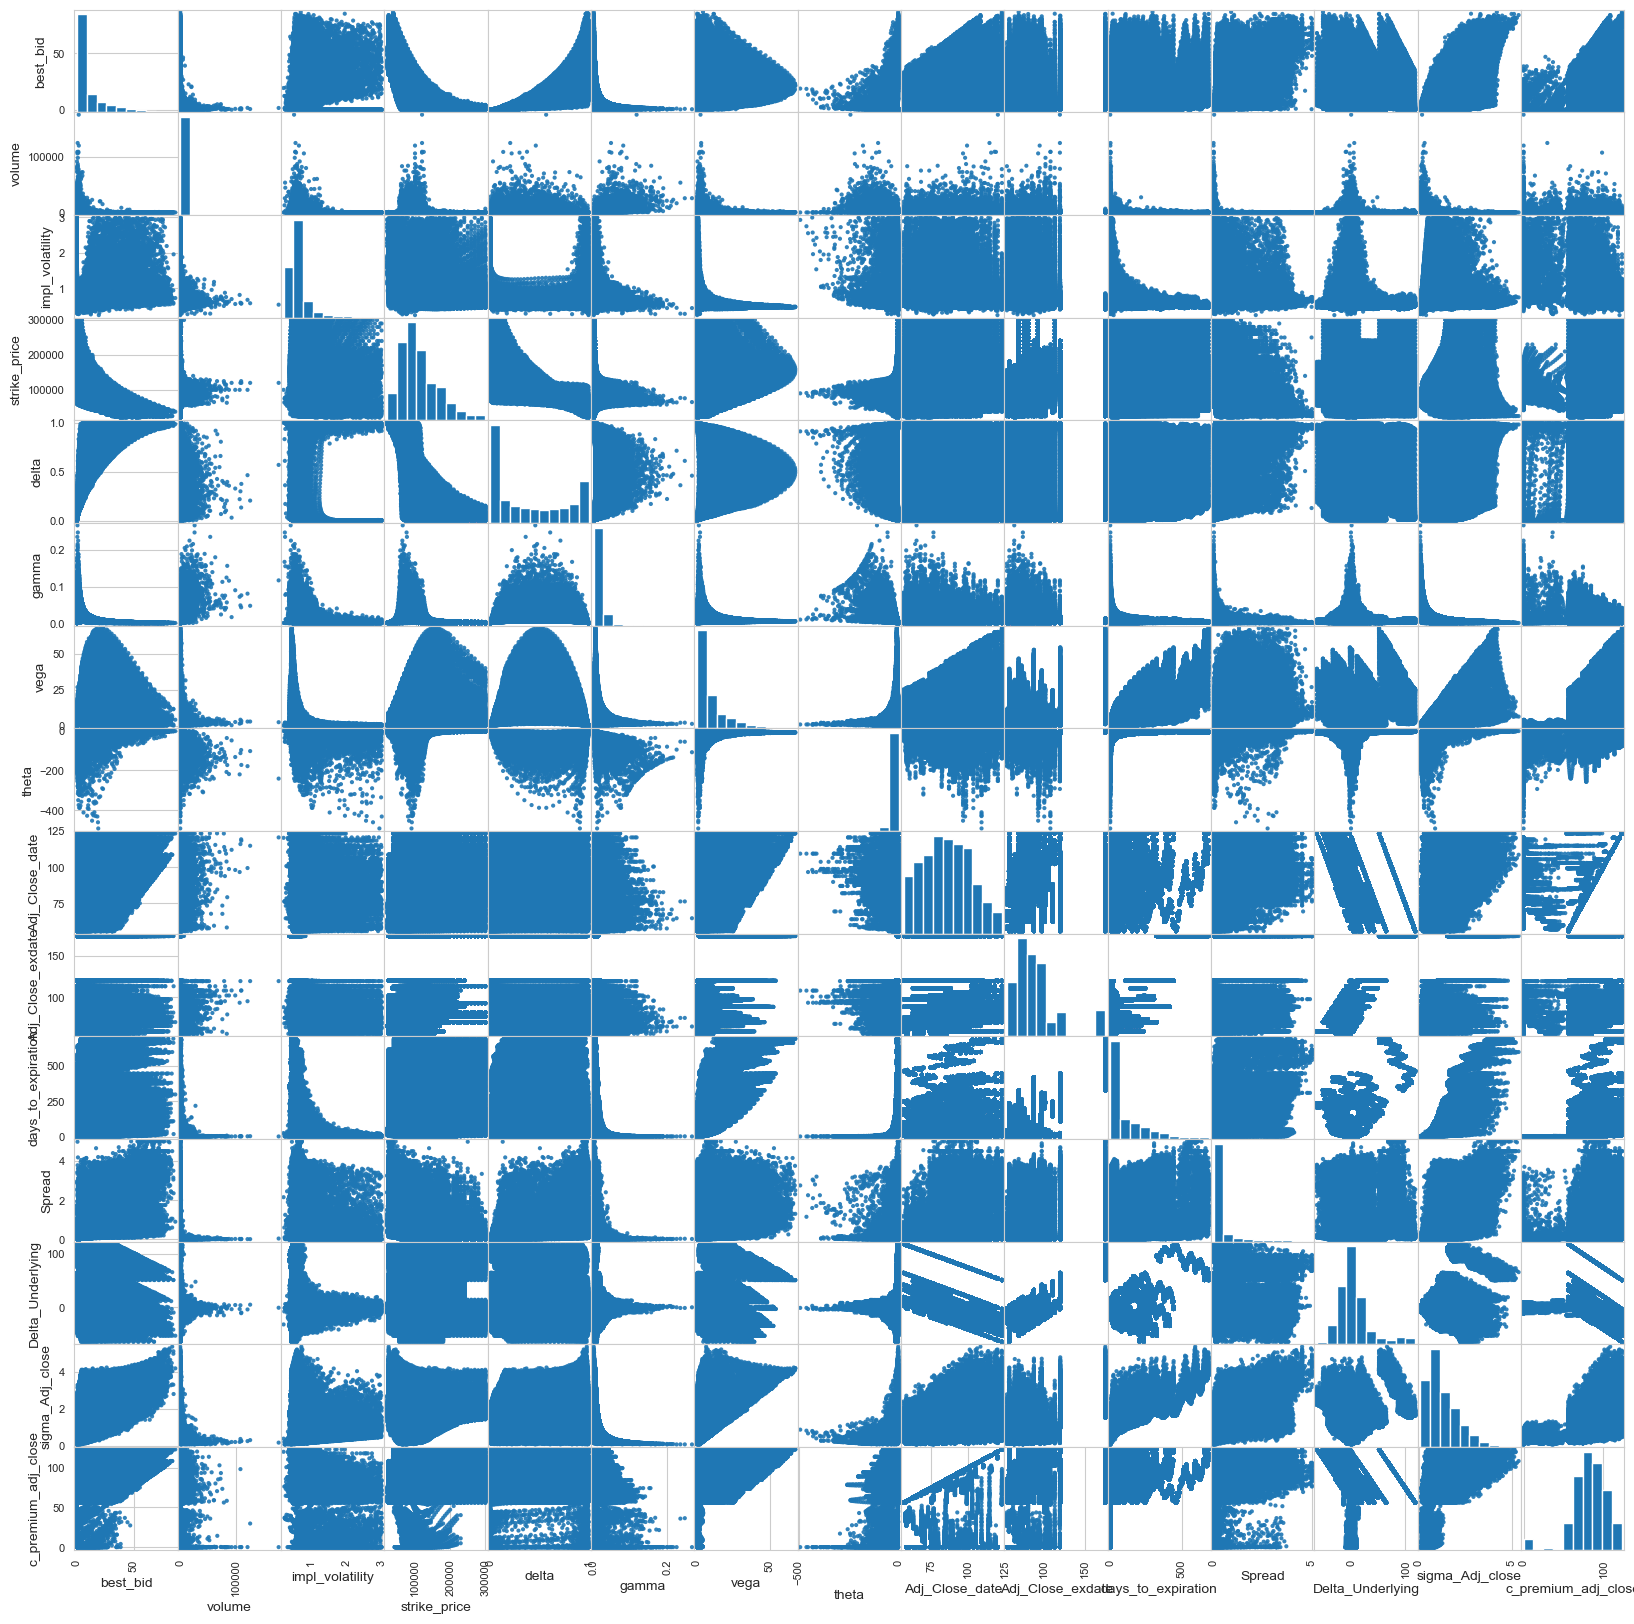

In [24]:
scatter_matrix(AMD_Calls, figsize=(20,20), alpha=.9)

plt.show()

Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [39]:
reg = LinearRegression()

In [40]:
reg.fit(X_train, y_train)

LinearRegression()

In [41]:
reg.coef_

array([-2.52946899e-01, -7.57394214e-04, -2.27534550e+01,  3.67470521e-05,
        1.19546625e+01,  1.10808813e+02,  2.32204137e-01,  2.26596617e-01,
        4.71009703e-01,  2.97478990e-01, -1.24396020e-01,  2.06065297e-01,
       -1.73530713e-01,  2.01941286e+01])

In [42]:
y_pred_sklearn = reg.predict(X_test)

In [43]:
print("the mse is", np.sum(np.power(y_test-y_pred_sklearn, 2))/len(y_test))

the mse is 142.4738299549551


Linear regression does not provide a good model as evidenced from the plots as well as high MSE. Removing predictors did not help and only amplified the MSE

Check Logistic Regression

In [70]:
# Define a new parameter called profit to check if the option sale was profitable or not using the calculated premium price
#AMD Calls
AMD_Calls['Profit'] = (AMD_Calls['Adj_Close_exdate'] - AMD_Calls['strike_price']/1000) - AMD_Calls['c_premium_adj_close']
AMD_Calls['Profit'] = [ele if ele > 0 else 0 for ele in AMD_Calls['Profit']]
AMD_Calls['Profit_or_Loss'] = [1 if ele > 0 else 0 for ele in AMD_Calls['Profit']]

In [105]:
#AMD Puts
AMD_Puts['Profit'] = (AMD_Puts['Adj_Close_exdate'] - AMD_Puts['strike_price']/1000) - AMD_Puts['p_premium_adj_close']
AMD_Puts['Profit'] = [ele if ele > 0 else 0 for ele in AMD_Puts['Profit']]
AMD_Puts['Profit_or_Loss'] = [1 if ele > 0 else 0 for ele in AMD_Puts['Profit']]

In [106]:
#NVDA Calls
NVDA_Calls['Profit'] = (NVDA_Calls['Adj_Close_exdate'] - NVDA_Calls['strike_price']/1000) - NVDA_Calls['c_premium_adj_close']
NVDA_Calls['Profit'] = [ele if ele > 0 else 0 for ele in NVDA_Calls['Profit']]
NVDA_Calls['Profit_or_Loss'] = [1 if ele > 0 else 0 for ele in NVDA_Calls['Profit']]

In [107]:
#NVDA Puts
NVDA_Puts['Profit'] = (NVDA_Puts['Adj_Close_exdate'] - NVDA_Puts['strike_price']/1000) - NVDA_Puts['p_premium_adj_close']
NVDA_Puts['Profit'] = [ele if ele > 0 else 0 for ele in NVDA_Puts['Profit']]
NVDA_Puts['Profit_or_Loss'] = [1 if ele > 0 else 0 for ele in NVDA_Puts['Profit']]

In [108]:
#TSMC Calls
TSMC_Calls['Profit'] = (TSMC_Calls['Adj_Close_exdate'] - TSMC_Calls['strike_price']/1000) - TSMC_Calls['c_premium_adj_close']
TSMC_Calls['Profit'] = [ele if ele > 0 else 0 for ele in TSMC_Calls['Profit']]
TSMC_Calls['Profit_or_Loss'] = [1 if ele > 0 else 0 for ele in TSMC_Calls['Profit']]

In [109]:
#TSMC Puts
TSMC_Puts['Profit'] = (TSMC_Puts['Adj_Close_exdate'] - TSMC_Puts['strike_price']/1000) - TSMC_Puts['p_premium_adj_close']
TSMC_Puts['Profit'] = [ele if ele > 0 else 0 for ele in TSMC_Puts['Profit']]
TSMC_Puts['Profit_or_Loss'] = [1 if ele > 0 else 0 for ele in TSMC_Puts['Profit']]

In [62]:
new_predictors = ['best_bid', 'volume', 'impl_volatility','strike_price',
       'delta', 'gamma', 'vega', 'theta','Adj_Close_date', 'Adj_Close_exdate',
       'days_to_expiration', 'Spread', 'Delta_Underlying',
       #'prct_change', 'hist_volatility',
                  'sigma_Adj_close']

In [76]:
# Try logistic regression for AMD Calls
X = AMD_Calls[new_predictors]
y = AMD_Calls['Profit_or_Loss']

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
reg = LogisticRegression(max_iter = 10000)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [81]:
reg.coef_

array([[-3.59444793e-01, -4.98099961e-05,  3.69644921e-03,
        -2.58988719e-04,  6.32020033e-04, -1.16160623e-03,
        -4.07518089e-01, -3.57913125e-02,  9.61422908e-02,
         1.16520448e-01,  2.47797311e-02,  1.43167767e-02,
         2.03781576e-02, -4.18503081e-02]])

In [82]:
y_pred_sklearn = reg.predict(X_test)

In [83]:
y_test.value_counts()

Profit_or_Loss
0    31327
1     1128
Name: count, dtype: int64

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_sklearn)

array([[31223,   104],
       [  265,   863]])

<span style='font-family:serif'>
<span style= 'background:#DBF9FC'>
    <font color='green'>This a good confusion matrix for the given dataset. Try for other cases.</font>

In [99]:
X = NVDA_Calls[new_predictors]
y = NVDA_Calls['Profit_or_Loss']

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2)

In [101]:
reg = LogisticRegression(max_iter = 10000)
reg.fit(X_test, y_test)

LogisticRegression(max_iter=10000)

In [102]:
y_pred_sklearn = reg.predict(X_test)

In [103]:
y_test.value_counts()

Profit_or_Loss
0    56628
1     1144
Name: count, dtype: int64

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_sklearn)

array([[56627,     1],
       [    3,  1141]])

<span style='font-family:serif'>
<span style= 'background:#DBF9FC'>
    <font color='green'>This a very good confusion matrix for the given dataset.</font>

In [113]:
X = TSMC_Calls[new_predictors]
y = TSMC_Calls['Profit_or_Loss']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2)

In [115]:
reg = LogisticRegression(max_iter = 10000)
reg.fit(X_test, y_test)

LogisticRegression(max_iter=10000)

In [116]:
y_pred_sklearn = reg.predict(X_test)

In [117]:
y_test.value_counts()

Profit_or_Loss
0    21682
1      879
Name: count, dtype: int64

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_sklearn)

array([[21592,    90],
       [  192,   687]])

 <span style='font-family:serif'>
<span style= 'background:#DBF9FC'>
    <font color='green'>This a very good confusion matrix for the given dataset as well.</font>

In [119]:
X = AMD_Puts[new_predictors]
y = AMD_Puts['Profit_or_Loss']

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2)

In [121]:
reg = LogisticRegression(max_iter = 10000)
reg.fit(X_test, y_test)

LogisticRegression(max_iter=10000)

In [122]:
y_pred_sklearn = reg.predict(X_test)

In [123]:
y_test.value_counts()

Profit_or_Loss
0    16302
1    12841
Name: count, dtype: int64

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_sklearn)

array([[15882,   420],
       [  450, 12391]])

<span style='font-family:serif'>
<span style= 'background:#DBF9FC'>
    <font color='green'>This a very good confusion matrix for the given dataset as well.</font>

In [125]:
X = NVDA_Puts[new_predictors]
y = NVDA_Puts['Profit_or_Loss']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2)

In [127]:
reg = LogisticRegression(max_iter = 10000)
reg.fit(X_test, y_test)

LogisticRegression(max_iter=10000)

In [128]:
y_pred_sklearn = reg.predict(X_test)

In [129]:
y_test.value_counts()

Profit_or_Loss
0    44989
1     7251
Name: count, dtype: int64

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_sklearn)

array([[44970,    19],
       [   14,  7237]])

<span style='font-family:serif'>
<span style= 'background:#DBF9FC'>
    <font color='green'>This a very good confusion matrix for the given dataset as well.</font>

In [132]:
X = TSMC_Puts[new_predictors]
y = TSMC_Puts['Profit_or_Loss']

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle=True,
                                                       random_state=435,
                                                       test_size=.2)

In [134]:
reg = LogisticRegression(max_iter = 10000)
reg.fit(X_test, y_test)

LogisticRegression(max_iter=10000)

In [135]:
y_pred_sklearn = reg.predict(X_test)

In [136]:
y_test.value_counts()

Profit_or_Loss
0    10701
1     9212
Name: count, dtype: int64

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_sklearn)

array([[10344,   357],
       [  386,  8826]])

<span style='font-family:serif'>
<span style= 'background:#DBF9FC'>
<font color='green'>This a very good confusion matrix for the given dataset as well.</font>

<span style='font-family:serif'>
<span style= 'background:#DBF9FC'>
For next steps, we can use random forest method to zero down on feature importance within the predictors to check for influence on profit or loss. Also profit or loss can be more precisely calculated. 